### **SciPy**

```
conda install scipy
```

SciPy is an open-source library in Python used for scientific computing and technical computing.

Documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/index.html).

Also, a lot of useful examples and explanations are [here](http://scipy-lectures.org/).

We are going to see some of the most useful examples.

General remarks: there are many, very many functions implemented in SciPy. You should know which one you want to use as a scientist first, then look for them in SciPy. If you are not sure which one you want for a particular problem, don't choose the fanciest one, start with something simple - most likely it's faster.

In [2]:
conda install scipy

Jupyter detected...
2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done

## Package Plan ##

  environment location: /home/cpizina/miniconda3/envs/conda_2025

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scipy-1.16.3               |  py314h3d0cd3c_0        22.2 MB
    ------------------------------------------------------------
                                           Total:        22.2 MB

The following NEW packages will be INSTALLED:

  libgfortran        pkgs/main/linux-64::libgfortran-15.2.0-h166f726_7 
  libgfortran5       pkgs/main/linux-64::libgfortran5-15.2.0-hc633d37_7 
  scipy              pkgs/main/linux-64::scipy-1.16.3-py314h3d0cd3c_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executin

In [3]:
import scipy as sp

#### **scipy.constants**

you should just know they exist

[list of constants](https://docs.scipy.org/doc/scipy/reference/constants.html)

In [4]:
import scipy.constants as spc
print("pi:", spc.pi)
print("Golden ratio:", spc.golden_ratio)
print("Speed of light (in vacuum):", spc.c)
print("Gravitational Constant:", spc.G)
print("Molar Gas Constant:", spc.R)
print("Boltzman Constant:", spc.k)
print("Proton mass Constant:", spc.proton_mass)

pi: 3.141592653589793
Golden ratio: 1.618033988749895
Speed of light (in vacuum): 299792458.0
Gravitational Constant: 6.6743e-11
Molar Gas Constant: 8.31446261815324
Boltzman Constant: 1.380649e-23
Proton mass Constant: 1.67262192595e-27


#### **scipy.optimize**

In [3]:
#import scipy as sp
#help(sp.optimize)

Finding extrema example:

Minimum value: -7.945823375615284
Location of minimum: -1.3064400120612139


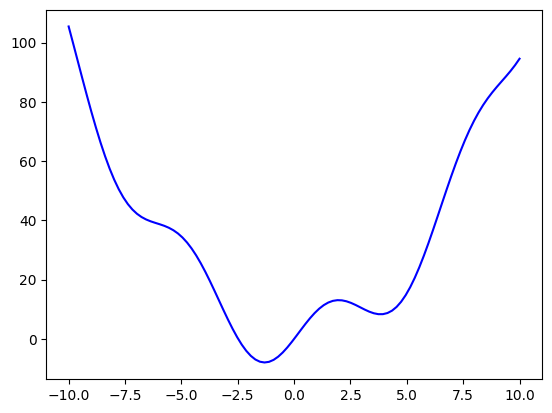

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

def func(x):
    return x**2 + 10*np.sin(x)

result = minimize_scalar(func)
print("Minimum value:", result.fun)
print("Location of minimum:", result.x)

x = np.linspace(-10, 10, 100)
y=func(x)
plt.plot(x, y, 'b-')

Curve fitting example:

[1.31940315 0.82265934]


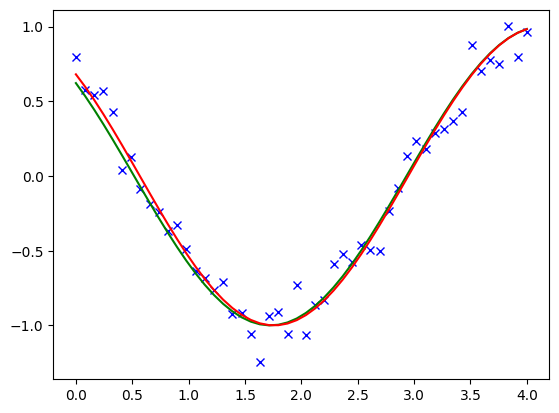

In [8]:
from scipy import optimize

np.random.seed(0)

# Let's generate fake data that we can "fit" then 
def f(x, a, phi):
    return np.cos(a * x + phi)

#random makes it look like experimental data
x = np.linspace(0, 4, 50)
y = f(x, 1.3, 0.9) + .1*np.random.normal(size=50)

# Now fit the model: the parameters omega and phi can be found in the
# `params` vector
params, params_cov = optimize.curve_fit(f, x, y)

print(params)

# plot the data and the fitted curve
plt.plot(x, y, 'bx')
plt.plot(x,f(x,1.3,0.9),'g-')
plt.plot(x, f(x, *params), 'r-')

#### **scipy.linalg**

There are a few functions that exist both in numpy and scipy. If you are using scipy anyway for something advanced, you might as well use it's simple matrix routines too (but try to time which is faster in each case).

In [5]:
import scipy.linalg as splin

# create matrix
A = np.array([[1, 2], [3, 4]])

# calculate inverse
A_inv = splin.inv(A)

print("Inverse of A:\n", A_inv)

Inverse of A:
 [[-2.   1. ]
 [ 1.5 -0.5]]


#### **scipy.integrate**

In [6]:
from scipy.integrate import quad

def func(x):
    return x**2 + 10*np.sin(x)

result, error = quad(func, 0, 10)
print("Result:", result)
print("Error:", error)
#help(quad)

Result: 351.72404862409786
Error: 4.505667807040075e-11


#### **scipy.interpolate**

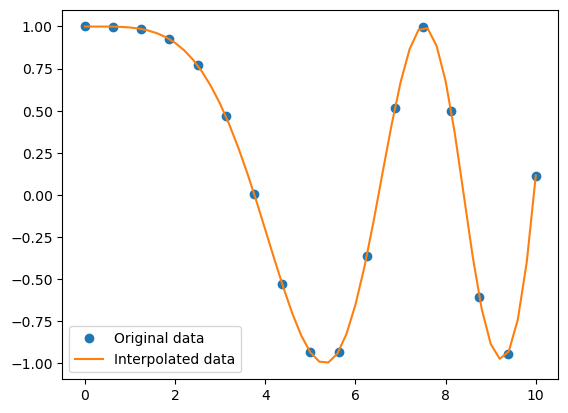

In [8]:
from scipy.interpolate import interp1d


# generate data
x = np.linspace(0, 10, 17)
y = np.cos(-x**2/9.0)

# interpolate
f = interp1d(x, y, kind='cubic')
x_interp = np.linspace(0, 10, num=51)
y_interp = f(x_interp)

# plot original and interpolated data
plt.plot(x, y, 'o', label='Original data')
plt.plot(x_interp, y_interp, label='Interpolated data')
plt.legend()

#### **scipy.signal**

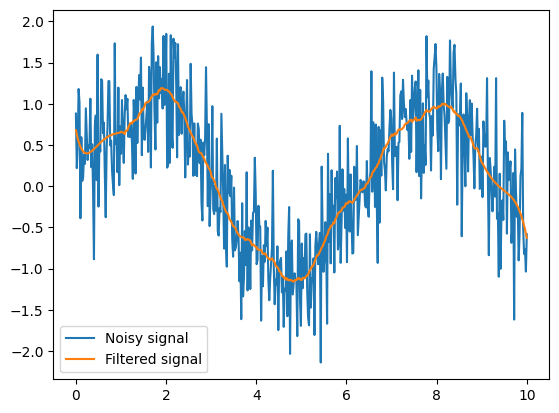

In [9]:
from scipy.signal import savgol_filter
#help(sp.signal)

# generate noisy signal
np.random.seed(0)
x = np.linspace(0, 10, 500)
y = np.sin(x) + 0.5 * np.random.randn(500)

# filter noisy signal
y_filtered = savgol_filter(y, 100, 5)

# plot signals
plt.plot(x, y, label="Noisy signal")
plt.plot(x, y_filtered, label="Filtered signal")
plt.legend()

#### **scipy.stats**

this is an example for those who know anything about statistics beyond the "mean"

[ 0.38273243 -0.03424228  1.09634685 -0.2342158  -0.34745065 -0.58126848
 -1.63263453 -1.56776772 -1.17915793  1.30142807  0.89526027  1.37496407
 -1.33221165 -1.96862469 -0.66005632  0.17581895  0.49869027  1.04797216
  0.28427967  1.74266878 -0.22260568 -0.91307922 -1.68121822 -0.88897136
  0.24211796 -0.88872026  0.93674246  1.41232771 -2.36958691  0.8640523
 -2.23960406  0.40149906  1.22487056  0.06485611 -1.27968917 -0.5854312
 -0.26164545 -0.18224478 -0.20289684 -0.10988278  0.21348005 -1.20857365
 -0.24201983  1.51826117 -0.38464542 -0.44383609  1.0781973  -2.55918467
  1.1813786  -0.63190376  0.16392857  0.09632136  0.94246812 -0.26759475
 -0.67802578  1.29784579 -2.36417382  0.02033418 -1.34792542 -0.76157339
  2.01125668 -0.04459543  0.1950697  -1.78156286 -0.72904466  0.1965574
  0.35475769  0.61688655  0.0086279   0.52700421  0.45378191 -1.82974041
  0.03700572  0.76790241  0.58987982 -0.36385881 -0.80562651 -1.11831192
 -0.13105401  1.13307988 -1.9518041  -0.65989173 -1.13

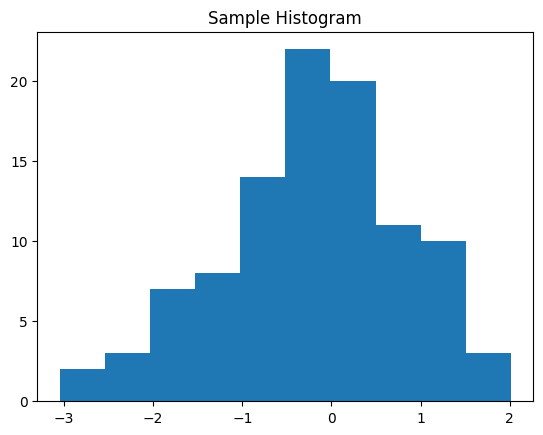

In [10]:
import scipy.stats as stats

# generate a sample of 100 observations from a normal distribution
sample = stats.norm.rvs(loc=0, scale=1, size=100)
print(sample)

# calculate mean, median, and standard deviation
mean = np.mean(sample)
median = np.median(sample)
std = np.std(sample)

# plot a histogram
plt.hist(sample)
plt.title("Sample Histogram")

# perform a one-sample t-test
t_stat, p_value = stats.ttest_1samp(sample, 0)

# calculate the 95% confidence interval for the mean
conf_int = stats.t.interval(confidence=0.95, df=len(sample)-1, scale=std/np.sqrt(len(sample)), loc=mean)

print("Mean: ", mean)
print("Median: ", median)
print("Standard Deviation: ", std)
print("T-Statistic: ", t_stat)
print("P-Value: ", p_value)
print("95% Confidence Interval: ", conf_int)
